In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# DEFINING THE CONSTANTS
# t -> Total sample time (in seconds)
# t0 -> Initial time
# delta_t -> Time step between successive calculations of the positions (in seconds)
# m -> Mass of the particle (in Kg)
# q -> Charge on the particle (Coulomb)

a = int(input("1.Electron\n2.Proton\n3.Alpha Particle\nChoose the particle:"))
e = 1.6e-19
t0 = 0

if(a==1): # Electron properties
  m = 9.1e-31
  q = -e
  t = 1e-10
  delta_t = 1e-14
  title = "Trajectory of an Electron (in 10^-10 s)"
elif(a==2): # Proton properties
  m = 1.67e-27
  q = e
  t = 1e-7
  delta_t = 1e-11
  title = "Trajectory of a Proton (in 10^-7 s)"
elif(a==3): # Alpha particle properties
  m = 6.645e-27
  q = 2*e
  t = 1e-6
  delta_t = 1e-10
  title = "Trajectory of an Alpha particle (in 10^-7 s)"
else:
  print("Invalid input")


1.Electron
2.Proton
3.Alpha Particle
Choose the particle:2


In [13]:
# S -> Initial Position of the particle (x,y,z)
def position():
  S = np.array([0,0,0],dtype = float)
  return S

In [14]:
# V -> Initial Velocity vector of the particle (i,j,k)
def velocity():
  V = np.array([0,0,0], dtype = float)  #change these values to change the velocity vector
  return V

In [15]:
# B -> Magnetic field vector (i,j,k)
def magnetic_field():
  B = np.array([0,1,0],dtype = float) #change these values to change magnetic field
  return B

In [16]:
# E -> Electric field vector (i,j,k)
def electric_field():
  E = np.array([1,0,0],dtype = float) #change these values to change electric field
  return E

In [17]:
#FUNCTION FOR CALCULATING THE POSITION OF THE PARTICLE AT EACH TIMESTEP
# F -> Lorentz Force on the particle at each timestep
# P -> Momentum of the particle at each timestep
# positions -> Array for storing x,y,z positions of the particle at each timestep

def calculate(q,m,t0,t,delta_t,S,V,P,B,E):
  positions = np.zeros((10000,3))
  positions[0] = S
  i=0
  while i<(t/delta_t-1):
    F = q*(E + np.cross(P/m,B)) #
    P += F*delta_t  # Final Momentum = Initial Momentum + Force.dt
    positions[i+1] = positions[i] + P/m*delta_t # Final Position = Initial Position + Velocity.dt
    t0 += delta_t  # Increments t0 by delta_t
    i+=1  # Increments iteration variable
  return positions

In [18]:
S = position()
V = velocity()
B = magnetic_field()
E = electric_field()
P = m*V  # Initial momentum of the particle
positions = calculate(q,m,t0,t,delta_t,S,V,P,B,E)

In [19]:
posx,posy,posz = [],[],[]  # Arrays for storing the x,y and z positions seperately
for i in range(positions.shape[0]):
  posx.append(positions[i][0])
  posy.append(positions[i][1])
  posz.append(positions[i][2])

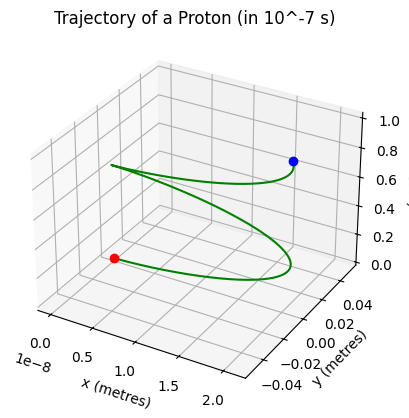

In [20]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.plot3D(posx, posy, posz, 'green')
ax.plot3D(posx[0],posy[0],posz[0], 'ro')  #starting position(red mark)
ax.plot3D(posx[-1],posy[-1],posz[-1], 'bo') #ending position(blue mark)

ax.set_xlabel('x (metres)')
ax.set_ylabel('y (metres)')
ax.set_zlabel('z (metres)')
ax.set_title(title)
plt.show()